# Selected homework

Using brute force compute all solutions $(x,y) \in K^2$ such that $y^2 \equiv x^3 + 7 \bmod 37$. Hint: Do not forget the neutral element.

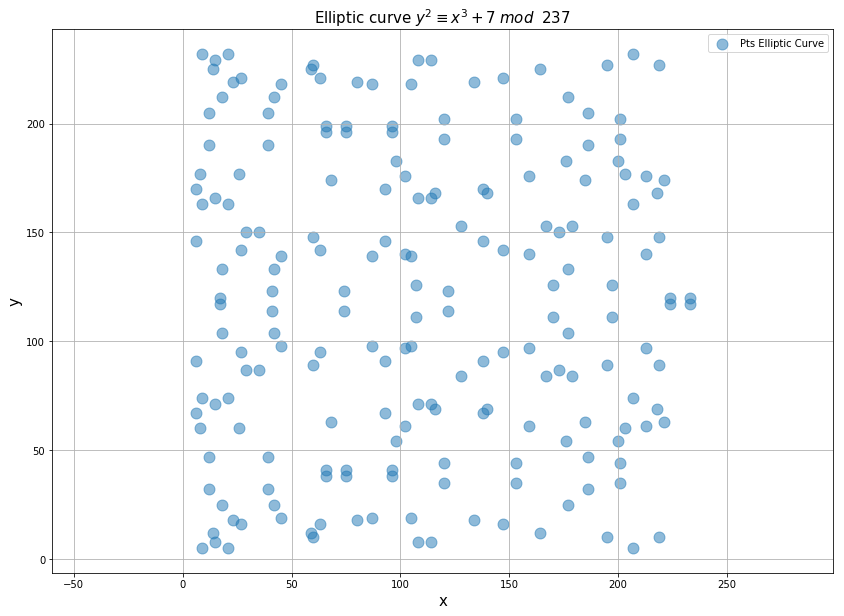

198


In [13]:
from mod import Mod

xs = []
ys = []
p = 237
for x in range(0,p):
    for y in range(0,p):
        if Mod(y*y, p) == Mod(x*x*x + 7, p):
            xs.append(x)
            ys.append(y)
            
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(xs, ys, 120, alpha=0.5, label="Pts Elliptic Curve") 
ax.axis('equal')
ax.grid(True)
ax.set_xlabel(r'x', fontsize=15)
ax.set_ylabel(r'y', fontsize=15)
ax.legend()
ax.set_title('Elliptic curve $y^2 \equiv x^3 + 7\;mod\;$ ' + str(p), fontsize=15)
plt.savefig('elliptic_curve.png')
plt.show()
print(len(xs))

One solution is given by the point $(8,1)$. Compute all points of the group generated by this point. Hint: To perform the addition use the fastecdsa Python package. What can you say about the order of this group?

(8, 1)
(24, 17)
(6, 1)
(23, 36)
(32, 17)
(18, 17)
(18, 20)
(32, 20)
(23, 1)
(6, 36)
(24, 20)


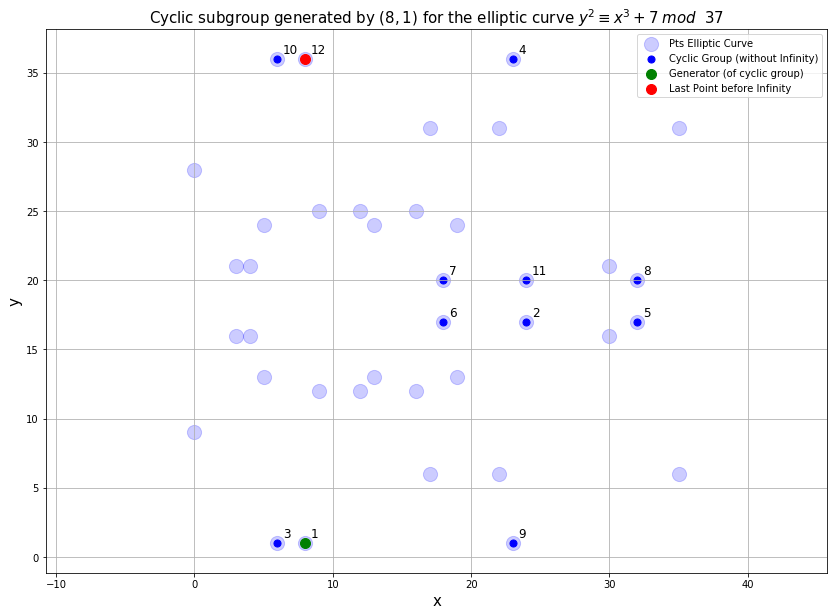

In [45]:
# define a curve
from fastecdsa.curve import Curve
from fastecdsa.point import Point
# y^2 \equiv x^3 ax + b \bmod p

class Points(object):
    def __init__(self, curve):
        self.__curve = curve
        self.__points = []
    @property
    def curve(self):
        return self.__curve
    
    @property
    def points(self):
        return self.__points
        
    @property
    def x(self):
        return [p.x for p in self.points]
    
    @property
    def y(self):
        return [p.y for p in self.points]
    
    def append(self, x,y):
        self.points.append(Point(x,y,self.curve))

    def __getitem__(self,item):
        return self.__points[item]
    
    def __len__(self):
        return len(self.__points)
    
p = 37
curve = Curve(
    "Homework",  
    p=p,  
    a=0,  
    b=7,  
    q=p*2, #p*2, # size of the group generated by g, we overestimate the size of the group 
           # in general this shouldn't be an argument (Schoof?)
    gx=None,  # define a generating point g
    gy=None   # 
)

points = Points(curve=curve)

for x in range(0,p):
    for y in range(0,p):
        if Mod(y*y, p) == Mod(x*x*x + 7, p):
            points.append(x,y)
                        

# take the first point for the path
G = points[10]

path = Points(curve = curve)
# at the starting point to path
path.append(G.x, G.y)

X = G
while not (X.x==G.x and X.y != G.y):
    # compute the new point
    print((X.x, X.y))
    X = X + G
    path.append(X.x, X.y)
    #print(X)
    
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(points.x, points.y, 200, c="blue", alpha=0.2, label="Pts Elliptic Curve")
ax.scatter(path.x, path.y, 50, c="blue", alpha=1.0, label="Cyclic Group (without Infinity)")
ax.scatter(path[0].x, path[0].y, 100, c="green", alpha=1.0, label="Generator (of cyclic group)")
ax.scatter(path[-1].x, path[-1].y,100, c="red", alpha=1.0, label="Last Point before Infinity")
#ax.plot(path.x,path.y, label="Order of Cyclic Group")
ax.axis('equal')

for n,point in enumerate(path, start=1):
    ax.text(point.x+.4, point.y+.4, n, fontsize=12)


ax.grid(True)
ax.set_xlabel(r'x', fontsize=15)
ax.set_ylabel(r'y', fontsize=15)
ax.legend()
ax.set_title('Cyclic subgroup generated by $(8,1)$ for the elliptic curve $y^2 \equiv x^3 + 7\;mod\;$ ' + str(p), fontsize=15)
plt.savefig('cyclic_group.png')
plt.show()

Compute all primitive roots for $p = 37$ using brute force.

In [50]:
import pandas as pd

def f(value, modulus):
    return pd.Series({n : Mod(value = value**n, modulus=modulus) for n in range(0, modulus)})

p = 37
y = pd.Series({x : len(f(value=x, modulus=p).unique()) for x in range(1, p)})
y[y==p-1]

2     36
5     36
13    36
15    36
17    36
18    36
19    36
20    36
22    36
24    36
32    36
35    36
dtype: int64

How many elements are in the group $G$ generated by $8$ for $p=97$.